<a href="https://colab.research.google.com/github/MarcoAntonioMndz/primerospasos_IA/blob/main/Tarea3_RedKeras_MendezMarco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5 color='blue'>

## <center> Tarea 3. Mi primera red neuronal con Keras </center>

<font size=4>El objetivo de esta tarea es únicamente la de mecanizar lo visto en la clase 5, haciendo cambios ligeros a la definición de la red neuronal, que tendrás que hacer tú a mano. De igual manera, queremos que domines los métodos de Pandas que se han trabajado hasta el momento. 
    
<font size=4>Sigue las instrucciones al pie de la letra. Todo el material que se te preguntará en esta tarea viene en las semanas 4 y 5. Recuerda instalar Tensorflow para poder realizar este trabajo

<font size=5 color='blue'>
Información sobre el problema a resolver

<font size=4>

Evolución de la enfermedad de pacientes con Diabetes Mellitus despues de un año.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo:

     Colesterol Total 
     Baja densidad de liporoteinas
     Alta densidad de lipoproteinas
     Triglicéridos
     Concentración de Lamorigina
     Glucosa

<font size=5 color='blue'>
    
Cuantificación de esta información

<font size=4>

Se tienen información de 442 pacientes (m = 442). La respuesta de interés, Y, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de Y varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    Artículo original: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import time

np.random.seed(1)

<font size=4>1. Importa el archivo *diabetes.csv* como un DataFrame de Pandas. De igual manera, muestra los primeros 5 registros de dicho dataset.

In [ ]:
# Importamos el archivo con la librería pandas.
df = pd.read_csv("/content/diabetes.csv", sep ="\t")

# Mostramos los primeros 5 registros.
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<font size=4>2. Muestra la estadística general de las columnas que componen el dataset. Con esta información, responde a las siguientes preguntas:
    
    * ¿Cúal es la edad promedio de los pacientes del estudio?
      
       48.52 años.

    * ¿Cúal es el índice de masa corporal máximo registrado?

      42.2.
    
    * ¿Qué edad tiene el paciente más joven del estudio?

      19 años.

In [ ]:
# Con describe podemos obtener la información estadística 
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


<font size=4>3. Elabora los histogramas de cada uno de los rasgos con los que trabajarás en este problema

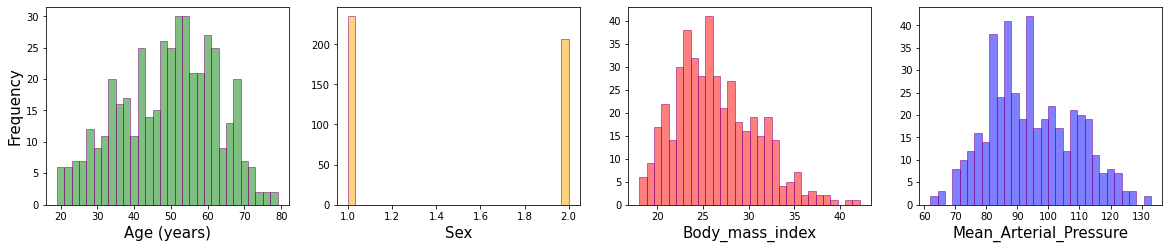

In [ ]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Mean_Arterial_Pressure', size=15);

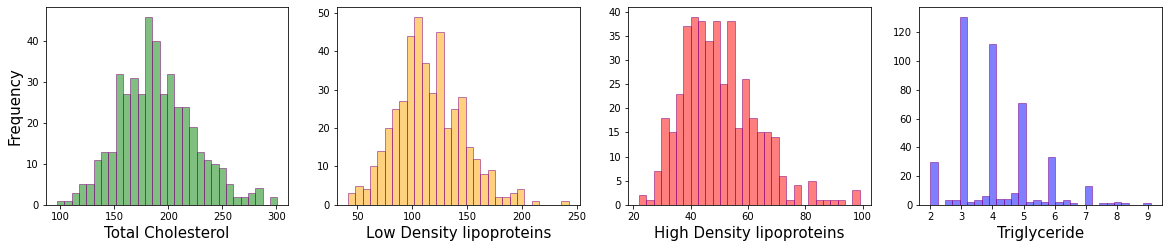

In [ ]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Total Cholesterol', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Low Density lipoproteins', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('High Density lipoproteins', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Triglyceride', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

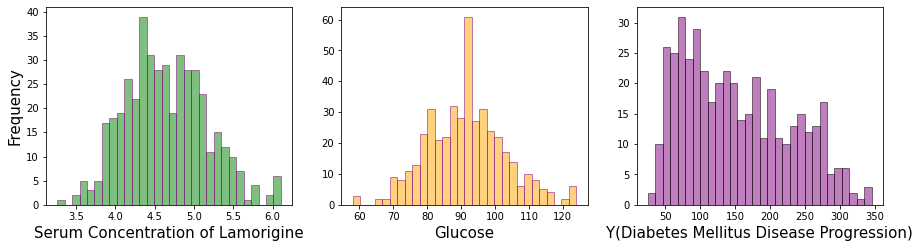

In [ ]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Serum Concentration of Lamorigine', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Glucose', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)

<font size=4>4. Elimina cualquier posible correlación presente entre los registros del estudio de diabetes

In [ ]:
# Para eliminar las posibles correlaciones reordenamos al azar.
df = df.sample(frac=1)

<font size=4>5. Divide el dataset en dos subconjuntos: uno para aprender y otro para realizar inferencias. El conjunto de aprendizaje deberá contener el 90% de los registros del dataset. Imprime también las dimensiones de cada conjunto creado en este paso

In [ ]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

# Realizamos la separación del dataset en dos conjuntos.

# Conjunto entrenamiento.
df_train = df.iloc[0:train_ratio,:]

#Conjunto test.
df_test  = df.iloc[train_ratio:,:]

In [ ]:
# Revisamos las dimensiones de los conjuntos que creamos.
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=4>6. Normaliza los conjuntos de entrenamiento y de prueba, utilizando la estadística del conjunto de entrenamiento.

Normalizamos las muestras que se emplearán en el entrenamiento, tanto las variables que describen los rasgos (X) como las variables objetivo (Y):

$$x_{i,norm} = \dfrac{x_{i}-\mu}{\sigma}$$
    
$$y_{i,norm} = \dfrac{y_{i}-\mu}{\sigma}$$

In [ ]:
# Normalizamos conjunto de entrenamiento.
df_train_norm = (df_train - df_train.mean()) / df_train.std()
df_train_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
246,0.880549,-0.923573,-0.678927,-1.292722,1.678453,1.072260,1.179208,-0.202277,0.963141,-1.241175,-0.960557
425,-1.627292,-0.923573,-0.858406,-1.702184,-2.097449,-2.351121,0.482966,-1.597924,-0.422665,-1.065445,0.009443
293,-1.475302,-0.923573,1.923531,0.271467,0.439035,0.895527,0.018804,0.014824,-1.148812,-0.011066,0.638633
31,-0.487365,-0.923573,-1.374411,-1.702184,-0.800383,-1.113991,1.256568,-1.597924,-0.779650,-0.889715,-1.209611
359,0.804554,1.080025,0.106298,0.680929,0.150798,0.371874,-0.522717,0.728154,0.321844,1.306908,2.093633


Es importante notar que la normalización de las muestras de prueba se realiza con los valores de $\mu$ y $\sigma$ obtenidos con las muestras empleadas para el entrenamiento

In [ ]:
# Normalizamos conjunto test.
df_test_norm = (df_test - df_train.mean()) / df_train.std()
df_test_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
410,-0.183384,1.080025,-0.589187,0.175420,1.015508,0.784251,-0.600078,0.728154,1.408068,-0.889715,0.756606
216,0.272587,1.080025,0.734477,1.042007,1.130803,1.556639,-1.451040,3.054233,0.974545,1.043313,1.267822
264,0.728558,1.080025,0.577432,-0.691166,-0.944502,-0.197598,-1.064239,-0.047205,-1.253375,-0.450391,-0.082314
209,0.804554,1.080025,-0.387272,1.403084,-1.059796,-0.341603,-1.605760,0.728154,-0.244655,-0.274661,-0.973665
316,0.348582,1.080025,0.285778,0.030989,0.035503,-0.439788,-0.677438,0.728154,1.597094,0.867583,0.900795


<font size=4>7. Convierte los valores normalizados de cada conjunto en arreglos de Numpy. Define dos variables para las X y las Y del conjunto de entrenamiento, y lo mismo para el conjunto test.

In [ ]:
# Conjunto de entrenamiento.
# Extraemos los valores del dataframe y lso convertimos en arreglos de Numpy.
x_train = df_train_norm.values[:,:-1]
y_train = df_train_norm.values[:,-1:]

# Imprimimos el tipo de nuestras variables.
print(type(x_train), type(y_train))

# Imprimimos las dimensiones de las variables.
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(397, 10)
(397, 1)


In [ ]:
# Repetimos para el conjunto test.
x_test = df_test_norm.values[:,:-1]
y_test = df_test_norm.values[:,-1:]
print(type(x_test), type(y_test))
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(45, 10)
(45, 1)


<font size=5 color='blue'>

# <center> Artificial Neural Networks </center>




<font size=5 color='blue'>
    
Definición de la arquitectura de la red neuronal.

In [ ]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

<font size=4>8. Utilizando la clase Network de la celda anterior, realiza el esquema de una red neuronal feed forward, que tenga las siguientes características:
    
    * 10 neuronas en la capa de entrada
    
    * 5 neuronas en la capa oculta
    
    * 1 neurona en la capa de salida

It has 3 layers,
with the following number of nodes per layer [10, 5, 1]


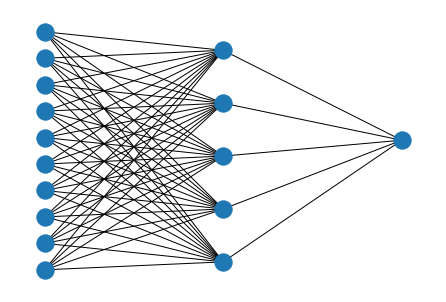

In [ ]:
layers = [ 10, 5, 1]
net = Network(layers)
net.graph(layers)

<font size=4>9. Define una función llamada *architecture*, la cual reciba como parámetros de entrada la dimensión de entrada, así como una función de activación. La función debe crear, utilizando la API de Keras, un modelo secuencial, cuyas capas representen el modelo que graficaste en el paso anterior. Los pesos deben ser inicializados con valores de una distribución uniforme, mientras que los bias se deben inicializar en ceros.

In [ ]:
def architecture(input_shape, activation):
    
    model = Sequential()
        
    model.add(Dense(5, kernel_initializer='uniform', bias_initializer='zeros', 
                    activation=activation, 
                    input_shape=input_shape))    
    model.add(Dense(1, kernel_initializer='uniform', bias_initializer='zeros', 
                    activation = activation))
    
    return model

<font size=4>10. Inicializa tu red neuronal, en una variable llamada *model_keras*. Utiliza la tangente hiperbólica como función de activación.

In [ ]:
input_shape = (10,)
activation = 'tanh'

# Inicializamos.
model_keras = architecture(input_shape = input_shape, activation = activation)

<font size=4>11. Utiliza la función *plot_model* para mostrar la información de la red neuronal que definiste previamente

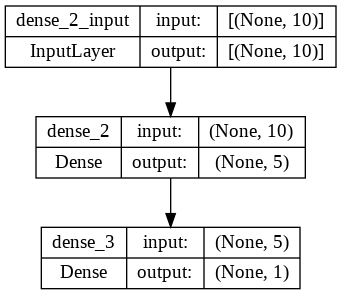

In [ ]:
plot_model(model_keras, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

<font size=4>12. Utilizando el método *summary* de tu red neuronal, contesta la siguiente pregunta:
    
    * ¿Cuántos parámetros entrenables contiene tu modelo?

      61 parámetros entrenables del modelo.

In [ ]:
# Método summary.
model_keras.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


<font size=4>13. Realiza la compilación de tu modelo con los siguiente hiperparámetros:
    
    * Utilliza un learning rate de 0.0001
    
    * Utiliza el optimizador Adam
    
    * La función de costo y la precisión estarán dados por el Error Cuadrático Medio

In [ ]:
# Compilamos.

# Learning rate.
lr = 0.0001
# Optimizador.
opt = Adam(learning_rate=lr)
# Función costo.
loss = tf.keras.losses.MeanSquaredError()
# Precisión.
acc = tf.keras.metrics.MeanSquaredError()

model_keras.compile(loss=loss, 
              optimizer=opt,
              metrics=[acc])

<font size=4> 14. Realiza el entrenamiento de tu red neuronal, usando 200 épocas, 32 registros por lote y con una división del conjunto de aprendizaje en 90-10 para los conjuntos de entrenamiento y validación. Mide también el tiempo que le llevó a tu computadora realizar este entrenamiento

In [ ]:
epochs = 200
start_time = time.time()
val_split=0.1

history_model = model_keras.fit(x_train, y_train,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split, 
                          shuffle=True,
                          verbose=2)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/200
12/12 - 0s - loss: 0.5714 - mean_squared_error: 0.5714 - val_loss: 0.5819 - val_mean_squared_error: 0.5819 - 458ms/epoch - 38ms/step
Epoch 2/200
12/12 - 0s - loss: 0.5707 - mean_squared_error: 0.5707 - val_loss: 0.5811 - val_mean_squared_error: 0.5811 - 36ms/epoch - 3ms/step
Epoch 3/200
12/12 - 0s - loss: 0.5698 - mean_squared_error: 0.5698 - val_loss: 0.5804 - val_mean_squared_error: 0.5804 - 38ms/epoch - 3ms/step
Epoch 4/200
12/12 - 0s - loss: 0.5693 - mean_squared_error: 0.5693 - val_loss: 0.5797 - val_mean_squared_error: 0.5797 - 37ms/epoch - 3ms/step
Epoch 5/200
12/12 - 0s - loss: 0.5686 - mean_squared_error: 0.5686 - val_loss: 0.5791 - val_mean_squared_error: 0.5791 - 35ms/epoch - 3ms/step
Epoch 6/200
12/12 - 0s - loss: 0.5681 - mean_squared_error: 0.5681 - val_loss: 0.5784 - val_mean_squared_error: 0.5784 - 33ms/epoch - 3ms/step
Epoch 7/200
12/12 - 0s - loss: 0.5674 - mean_squared_error: 0.5674 - val_loss: 0.5778 - val_mean_squared_error: 0.5778 - 33ms/epoch - 3ms/st

<font size=4>15. Realiza la gráfica de Costo vs Épocas de los conjuntos de entramiento y validación.   

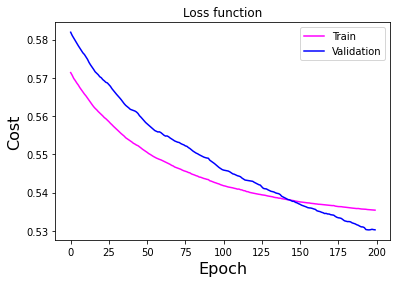

In [ ]:
plt.plot(history_model.history['loss'], 'magenta')
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

<font size=4>16. Utilizando el método *evaluate* de tu modelo, obten el costo sobre el conjunto test.

In [ ]:
scores = model_keras.evaluate(x_test, y_test)
print('Test loss:', scores[0])

2/2 [==============================] - 0s 6ms/step - loss: 0.5561 - mean_squared_error: 0.5561
Test loss: 0.5561131834983826


<font size=4>17. Finalmente, utilizando el método *predict* de la red neuronal, obten las predicciones sobre el conjunto de entramiento, y muestra la inferencia sobre el primer registro de estas predicciones (recuerda revertir la normalización para obtener la predicción en términos que podamos entender) 

In [ ]:
predictions = model_keras.predict(x_test)
print(len(predictions))

2/2 [==============================] - 0s 6ms/step
45


In [ ]:
predictions[0]*df_train.std() + df_train.mean()

AGE     48.526120
SEX      1.465244
BMI     26.464481
BP      94.689818
S1     189.066249
S2     115.499967
S3      49.867954
S4       4.071959
S5       4.641926
S6      91.223698
Y      151.934846
dtype: float64